In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
n = 9

In [3]:
df = pd.read_csv(f"{n}month_predictionresults.csv")

In [4]:
df

,Unnamed: 0,Month,Deaths,LSTM Predictions,SARIMA Predictions
0,0,2015-01-01,2771,0.000000,0.000000
1,1,2015-02-01,2627,0.000000,2540.838172
2,2,2015-03-01,2907,0.000000,2673.336257
3,3,2015-04-01,2822,0.000000,2865.711655
4,4,2015-05-01,2850,0.000000,2837.851862
...,...,...,...,...,...
67,67,2020-08-01,6165,5113.944336,5041.705897
68,68,2020-09-01,5683,5184.392578,4958.628025
69,69,2020-10-01,5613,5258.449707,5086.221253
70,70,2020-11-01,5613,5331.965332,5029.753481


In [5]:
original_train = df["Deaths"].iloc[n:62]
original_test = df["Deaths"].iloc[62:]
lstm_train = df["LSTM Predictions"].iloc[n:62]
lstm_test = df["LSTM Predictions"].iloc[62:]
sarima_train = df["SARIMA Predictions"].iloc[n:62]
sarima_test = df["SARIMA Predictions"].iloc[62:]

In [6]:
months = pd.to_datetime(df["Month"]).iloc[n:]
original = df["Deaths"].iloc[n:]
lstm = df["LSTM Predictions"].iloc[n:]
sarima = df["SARIMA Predictions"].iloc[n:]

In [7]:
lstm_train_rmse = np.sqrt(mean_squared_error(original_train, lstm_train))
lstm_test_rmse = np.sqrt(mean_squared_error(original_test, lstm_test))
sarima_train_rmse = np.sqrt(mean_squared_error(original_train, sarima_train))
sarima_test_rmse = np.sqrt(mean_squared_error(original_test, sarima_test))

In [8]:
print(lstm_train_rmse)
print(lstm_test_rmse)
print(sarima_train_rmse)
print(sarima_test_rmse)

279.05542148615496
1166.4283267310511
291.0273738860701
1188.404973127686


In [9]:
lstm_train_mape = mean_absolute_percentage_error(original_train, lstm_train) * 100
lstm_test_mape = mean_absolute_percentage_error(original_test, lstm_test) * 100
sarima_train_mape = mean_absolute_percentage_error(original_train, sarima_train) * 100
sarima_test_mape = mean_absolute_percentage_error(original_test, sarima_test) * 100

In [10]:
print(lstm_train_mape)
print(lstm_test_mape)
print(sarima_train_mape)
print(sarima_test_mape)

5.927560506070921
15.237481317650072
4.754349075263773
16.227844208285674


In [11]:
df.iloc[48:60]

,Unnamed: 0,Month,Deaths,LSTM Predictions,SARIMA Predictions
48,48,2019-01-01,3931,4255.804688,4058.557434
49,49,2019-02-01,3727,4254.808105,3800.864712
50,50,2019-03-01,4285,4212.387695,4104.815995
51,51,2019-04-01,3934,4238.809570,4060.751985
52,52,2019-05-01,4100,4226.270508,4030.262811
53,53,2019-06-01,4112,4233.122070,3981.997153
54,54,2019-07-01,4296,4262.296875,4184.037754
55,55,2019-08-01,4371,4303.212891,4268.184320
56,56,2019-09-01,4252,4380.977051,4267.545126
57,57,2019-10-01,4529,4418.830078,4312.770399


In [12]:
# val_lstm_train = df["LSTM Predictions"].iloc[48:60]
val_lstm_test = df["LSTM Predictions"].iloc[48:60]
# val_sarima_train = df["SARIMA Predictions"].iloc[48:60]
val_sarima_test = df["SARIMA Predictions"].iloc[48:60]
# original_train = df["Deaths"].iloc[9:62]
val_original_test = df["Deaths"].iloc[48:60]

In [13]:
val_lstm_test_mape = mean_absolute_percentage_error(val_original_test, val_lstm_test) * 100
val_sarima_test_mape = mean_absolute_percentage_error(val_original_test, val_sarima_test) * 100

print(val_lstm_test_mape)
print(val_sarima_test_mape)

4.04458667839666
2.935393129882669


Figure 1: Comparison of actual substance overdose mortality data with LSTM and SARIMA model predictions from January 2015 to December 2020. The blue line represents actual data, the red line shows LSTM predictions, and the green line shows SARIMA predictions. A vertical dashed line marks the start of forecasting in March 2020. The figure includes model performance metrics, with LSTM achieving lower MAPE in both training and testing periods compared to SARIMA, highlighting its superior prediction accuracy.


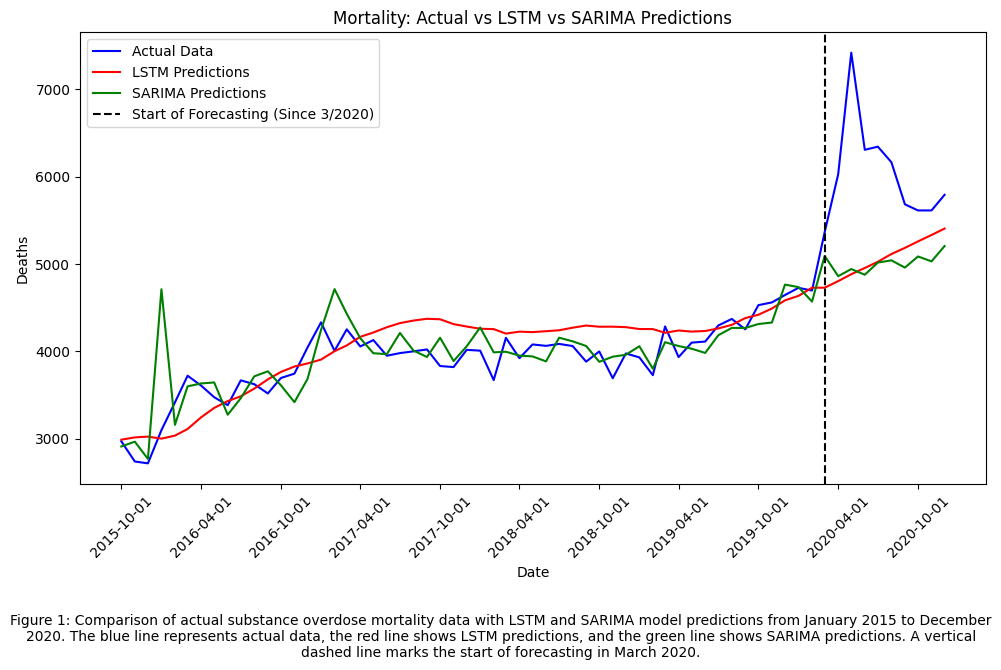

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(months, original, label='Actual Data', color='blue')
# plt.plot(months, lstm, label=f'LSTM Predictions (RMSE: {lstm_test_rmse:.2f}, MAPE: {lstm_test_mape:.2f}%)', color='red')
# plt.plot(months, sarima, label=f'SARIMA Predictions (RMSE: {sarima_test_rmse:.2f}, MAPE: {sarima_test_mape:.2f}%)', color='green')
plt.plot(months, lstm, label=f'LSTM Predictions', color='red')
plt.plot(months, sarima, label=f'SARIMA Predictions', color='green')
plt.axvline(pd.to_datetime('2020-03-01'), color='black', linestyle='--', label='Start of Forecasting (Since 3/2020)')
plt.title('Mortality: Actual vs LSTM vs SARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.xticks(months[::6], rotation=45)  # Simplify x-axis labels
plt.legend()
plt.tight_layout()
# plt.figtext(0.5, -0.1, 'Validation Period: Jan 2019 - Dec 2019 | Model retrained on Jan 2015 - Dec 2019', wrap=True, ha='center', fontsize=10)
plt.figtext(0.5, -0.1, 'Figure 1: Comparison of actual substance overdose mortality data with LSTM and SARIMA model predictions from January 2015 to December 2020. The blue line represents actual data, the red line shows LSTM predictions, and the green line shows SARIMA predictions. A vertical dashed line marks the start of forecasting in March 2020.', wrap=True, ha='center', fontsize=10)
plt.show()

In [15]:
def calculate_confidence_intervals(predictions, alpha=0.05):
    # Calculate mean and standard deviation
    mean_pred = np.mean(predictions)
    std_pred = np.std(predictions)
    
    # Calculate the z-score for the confidence level
    z_score = 1.96  # for 95% confidence
    margin_of_error = z_score * (std_pred / np.sqrt(len(predictions)))
    
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    
    return lower_bound, upper_bound

lower_bound_test, upper_bound_test = calculate_confidence_intervals(lstm_test)
lower_bound_sarima, upper_bound_sarima = calculate_confidence_intervals(sarima_test)


def calculate_overlap(lower1, upper1, lower2, upper2):
    # Initialize overlap count
    overlap_count = 0

    for l1, u1, l2, u2 in zip(lower1, upper1, lower2, upper2):
        # Check for overlap
        if u1 >= l2 and l1 <= u2:
            overlap_count += 1

    # Calculate percent overlap
    percent_overlap = (overlap_count / len(lower1)) * 100
    return percent_overlap

# Calculate percent overlap
percent_overlap = calculate_overlap(lower_bound_test, upper_bound_test, lower_bound_sarima, upper_bound_sarima)

print(f'Percent Overlap: {percent_overlap:.2f}%')

Percent Overlap: 60.00%


# LSTM calculate root mean squared error
print('LSTM')
trainScore = np.sqrt(mean_squared_error(original_train, lstm_train))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(original_test, lstm_test))
print('Test Score: %.2f RMSE' % (testScore))

#SARIMA Error Metrics
print('SARIMA')
trainScore = np.sqrt(mean_squared_error(original_train, sarima_train))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(original_test, sarima_test))
print('Test Score: %.2f RMSE' % (testScore))

plt.figure(figsize=(10, 6))
plt.plot(months, original, label='Actual Data', color='blue')
plt.plot(months, lstm, label='LSTM Predictions', color='red')
plt.plot(months, sarima, label='SARIMA Predictions', color='green')
plt.title('Deaths: Actual vs LSTM vs SARIMA Predictions (Without Scaling)')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.show()

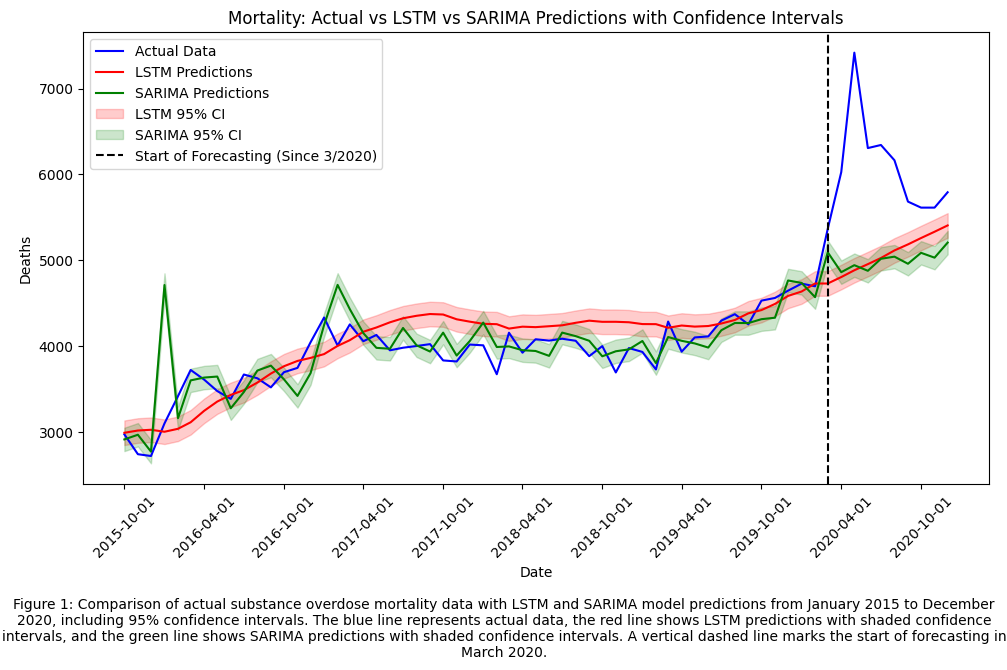

In [16]:
lower_bound_lstm, upper_bound_lstm = calculate_confidence_intervals(lstm)
lower_bound_sarima, upper_bound_sarima = calculate_confidence_intervals(sarima)

# Plot Actual vs Predictions with Confidence Intervals
plt.figure(figsize=(10, 6))
plt.plot(months, original, label='Actual Data', color='blue')
plt.plot(months, lstm, label=f'LSTM Predictions', color='red')
plt.plot(months, sarima, label=f'SARIMA Predictions', color='green')

# Shaded Confidence Intervals
plt.fill_between(months, lower_bound_lstm, upper_bound_lstm, color='red', alpha=0.2, label='LSTM 95% CI')
plt.fill_between(months, lower_bound_sarima, upper_bound_sarima, color='green', alpha=0.2, label='SARIMA 95% CI')

plt.axvline(pd.to_datetime('2020-03-01'), color='black', linestyle='--', label='Start of Forecasting (Since 3/2020)')
plt.title('Mortality: Actual vs LSTM vs SARIMA Predictions with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.xticks(months[::6], rotation=45)
plt.legend()
plt.tight_layout()
plt.figtext(0.5, -0.1, 'Figure 1: Comparison of actual substance overdose mortality data with LSTM and SARIMA model predictions from January 2015 to December 2020, including 95% confidence intervals. The blue line represents actual data, the red line shows LSTM predictions with shaded confidence intervals, and the green line shows SARIMA predictions with shaded confidence intervals. A vertical dashed line marks the start of forecasting in March 2020.', wrap=True, ha='center', fontsize=10)
plt.show()

In [17]:
# Overlap Calculation
def calculate_overlap(lower1, upper1, lower2, upper2):
    overlap_count = 0
    for l1, u1, l2, u2 in zip(lower1, upper1, lower2, upper2):
        if u1 >= l2 and l1 <= u2:
            overlap_count += 1
    percent_overlap = (overlap_count / len(lower1)) * 100
    return percent_overlap

percent_overlap = calculate_overlap(lower_bound_lstm, upper_bound_lstm, lower_bound_sarima, upper_bound_sarima)
print(f'Percent Overlap: {percent_overlap:.2f}%')

Percent Overlap: 69.84%


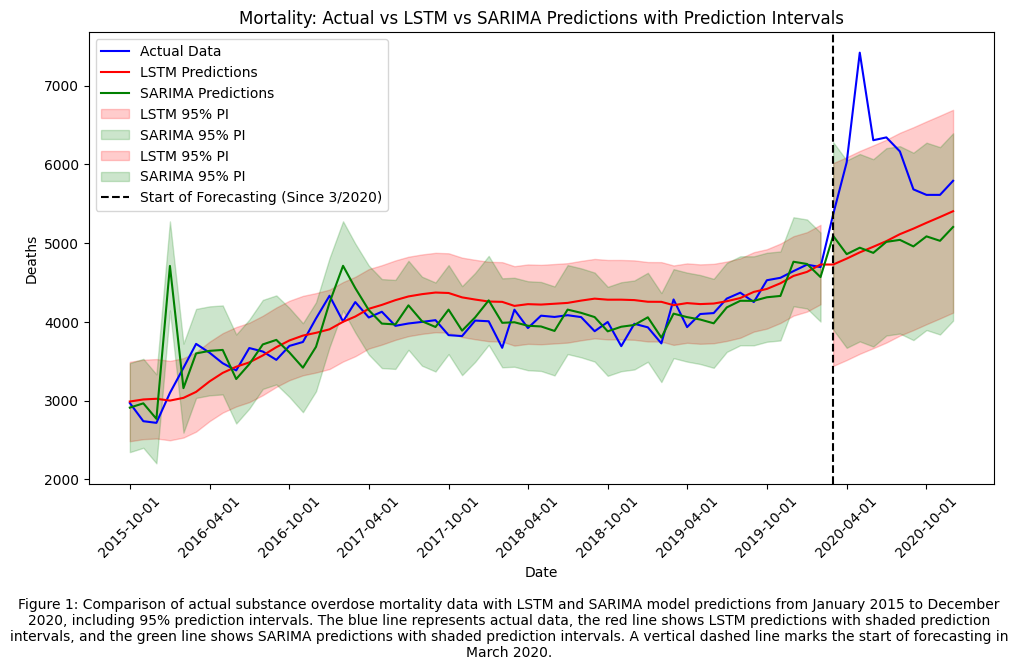

In [18]:
def calculate_prediction_intervals(actual, predictions, alpha=0.05):
    """
    Calculates the prediction intervals for a set of predictions.
    """
    residuals = actual - predictions
    std_residual = np.std(residuals)
    
    # Z-score for the desired confidence level (95% CI -> z = 1.96)
    z_score = 1.96  
    
    # Calculate the margin of error
    margin_of_error = z_score * std_residual

    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error

    return lower_bound, upper_bound

# Calculate Prediction Intervals for LSTM and SARIMA on the test set
lower_bound_lstm_train, upper_bound_lstm_train = calculate_prediction_intervals(original_train, lstm_train)
lower_bound_sarima_train, upper_bound_sarima_train = calculate_prediction_intervals(original_train, sarima_train)

lower_bound_lstm, upper_bound_lstm = calculate_prediction_intervals(original_test, lstm_test)
lower_bound_sarima, upper_bound_sarima = calculate_prediction_intervals(original_test, sarima_test)

# Plot Actual vs Predictions with Prediction Intervals
plt.figure(figsize=(10, 6))
plt.plot(months, original, label='Actual Data', color='blue')
plt.plot(months, lstm, label='LSTM Predictions', color='red')
plt.plot(months, sarima, label='SARIMA Predictions', color='green')

# Shaded Prediction Intervals
plt.fill_between(months.loc[:61], lower_bound_lstm_train, upper_bound_lstm_train, color='red', alpha=0.2, label='LSTM 95% PI')
plt.fill_between(months.loc[:61], lower_bound_sarima_train, upper_bound_sarima_train, color='green', alpha=0.2, label='SARIMA 95% PI')

plt.fill_between(months.loc[62:], lower_bound_lstm, upper_bound_lstm, color='red', alpha=0.2, label='LSTM 95% PI')
plt.fill_between(months.loc[62:], lower_bound_sarima, upper_bound_sarima, color='green', alpha=0.2, label='SARIMA 95% PI')

plt.axvline(pd.to_datetime('2020-03-01'), color='black', linestyle='--', label='Start of Forecasting (Since 3/2020)')
plt.title('Mortality: Actual vs LSTM vs SARIMA Predictions with Prediction Intervals')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.xticks(months[::6], rotation=45)
plt.legend()
plt.tight_layout()
plt.figtext(0.5, -0.1, 'Figure 1: Comparison of actual substance overdose mortality data with LSTM and SARIMA model predictions from January 2015 to December 2020, including 95% prediction intervals. The blue line represents actual data, the red line shows LSTM predictions with shaded prediction intervals, and the green line shows SARIMA predictions with shaded prediction intervals. A vertical dashed line marks the start of forecasting in March 2020.', wrap=True, ha='center', fontsize=10)
plt.show()

In [19]:
lower_bound_lstm

62    3440.760053
63    3515.848921
64    3595.006147
65    3666.353803
66    3737.920698
67    3826.062299
68    3896.510542
69    3970.567671
70    4044.083296
71    4117.652632
Name: LSTM Predictions, dtype: float64

In [20]:
upper_bound_lstm

62    6016.524126
63    6091.612993
64    6170.770220
65    6242.117876
66    6313.684771
67    6401.826372
68    6472.274615
69    6546.331743
70    6619.847368
71    6693.416704
Name: LSTM Predictions, dtype: float64

In [21]:
months

9    2015-10-01
10   2015-11-01
11   2015-12-01
12   2016-01-01
13   2016-02-01
        ...    
67   2020-08-01
68   2020-09-01
69   2020-10-01
70   2020-11-01
71   2020-12-01
Name: Month, Length: 63, dtype: datetime64[ns]

In [22]:
months.loc[62:]

62   2020-03-01
63   2020-04-01
64   2020-05-01
65   2020-06-01
66   2020-07-01
67   2020-08-01
68   2020-09-01
69   2020-10-01
70   2020-11-01
71   2020-12-01
Name: Month, dtype: datetime64[ns]

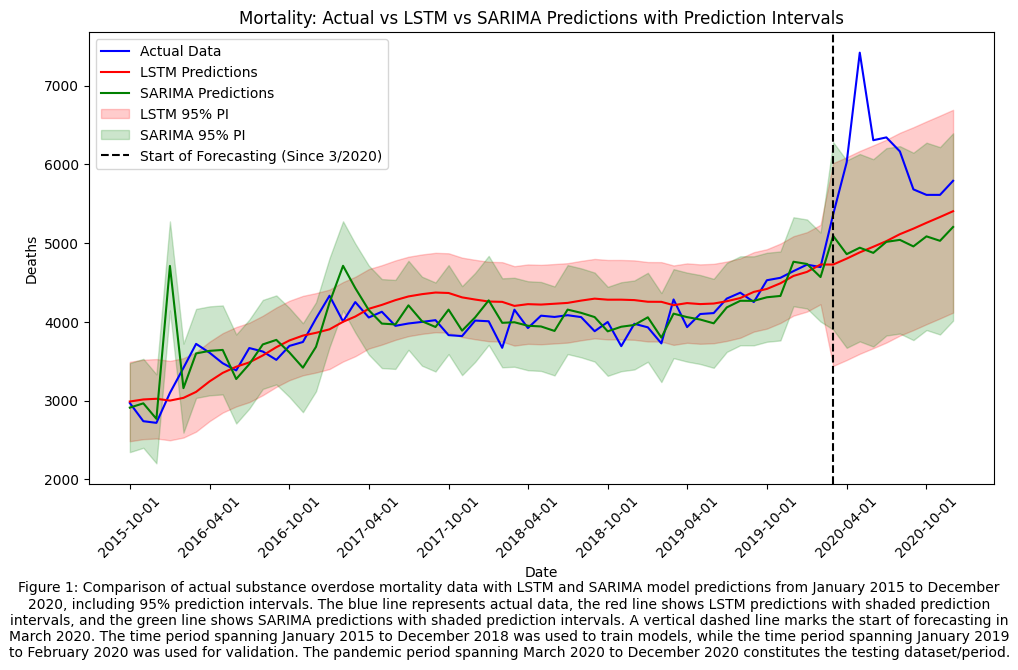

<Figure size 640x480 with 0 Axes>

In [26]:
def calculate_prediction_intervals(actual, predictions, alpha=0.05):
    """
    Calculates the prediction intervals for a set of predictions.
    """
    residuals = actual - predictions
    std_residual = np.std(residuals)
    
    # Z-score for the desired confidence level (95% PI -> z = 1.96)
    z_score = 1.96  
    
    # Calculate the margin of error
    margin_of_error = z_score * std_residual

    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error

    return lower_bound, upper_bound

# Calculate Prediction Intervals for LSTM and SARIMA (Train and Test)
lower_bound_lstm_train, upper_bound_lstm_train = calculate_prediction_intervals(original_train, lstm_train)
lower_bound_sarima_train, upper_bound_sarima_train = calculate_prediction_intervals(original_train, sarima_train)

lower_bound_lstm_test, upper_bound_lstm_test = calculate_prediction_intervals(original_test, lstm_test)
lower_bound_sarima_test, upper_bound_sarima_test = calculate_prediction_intervals(original_test, sarima_test)

# Combine Train and Test Prediction Intervals
lower_bound_lstm_full = pd.concat([lower_bound_lstm_train, lower_bound_lstm_test])
upper_bound_lstm_full = pd.concat([upper_bound_lstm_train, upper_bound_lstm_test])

lower_bound_sarima_full = pd.concat([lower_bound_sarima_train, lower_bound_sarima_test])
upper_bound_sarima_full = pd.concat([upper_bound_sarima_train, upper_bound_sarima_test])

# Combine Predictions
lstm_full = pd.concat([lstm_train, lstm_test])
sarima_full = pd.concat([sarima_train, sarima_test])

# Plot Actual vs Predictions with Combined Prediction Intervals
plt.figure(figsize=(10, 6))
plt.plot(months, original, label='Actual Data', color='blue')
plt.plot(months, lstm_full, label='LSTM Predictions', color='red')
plt.plot(months, sarima_full, label='SARIMA Predictions', color='green')

# Shaded Combined Prediction Intervals
plt.fill_between(months, lower_bound_lstm_full, upper_bound_lstm_full, color='red', alpha=0.2, label='LSTM 95% PI')
plt.fill_between(months, lower_bound_sarima_full, upper_bound_sarima_full, color='green', alpha=0.2, label='SARIMA 95% PI')

plt.axvline(pd.to_datetime('2020-03-01'), color='black', linestyle='--', label='Start of Forecasting (Since 3/2020)')
plt.title('Mortality: Actual vs LSTM vs SARIMA Predictions with Prediction Intervals')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.xticks(months[::6], rotation=45)
plt.legend()
plt.tight_layout()
plt.figtext(0.5, -0.1, 'Figure 1: Comparison of actual substance overdose mortality data with LSTM and SARIMA model predictions from January 2015 to December 2020, including 95% prediction intervals. The blue line represents actual data, the red line shows LSTM predictions with shaded prediction intervals, and the green line shows SARIMA predictions with shaded prediction intervals. A vertical dashed line marks the start of forecasting in March 2020. The time period spanning January 2015 to December 2018 was used to train models, while the time period spanning January 2019 to February 2020 was used for validation. The pandemic period spanning March 2020 to December 2020 constitutes the testing dataset/period.', wrap=True, ha='center', fontsize=10)
plt.show()
plt.savefig('serfigure.png')

In [24]:
percent_overlap = calculate_overlap(lower_bound_lstm_full, upper_bound_lstm_full, lower_bound_sarima_full, upper_bound_sarima_full)
print(f'Percent Overlap: {percent_overlap:.2f}%')

Percent Overlap: 98.41%
